In [317]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# 1.1.1 Split data into train and test data
from sklearn.model_selection import train_test_split

# 1.1.2 PReprocessong:
from sklearn.preprocessing import StandardScaler

# 1.1.3 Import class DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as dtree

# 1.1.4 To draw decision tree
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz


from sklearn.datasets import load_iris
import os

from sklearn.model_selection import train_test_split



from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [318]:
df = pd.read_csv('Dataset.csv') # Reads the contents of the CSV file
# dataset from Kaggle:https://www.kaggle.com/hafidhfikri/loan-approval-prediction/data

In [319]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [320]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [321]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [322]:
p=df.Loan_Status.value_counts()
p.head()

Y    422
N    192
Name: Loan_Status, dtype: int64

# Graph Plot

<AxesSubplot:ylabel='Loan_Status'>

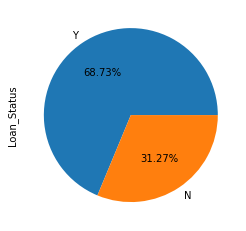

In [364]:
p.plot.pie(labels = ("Y", "N"),autopct = "%.2f%%")


[[Text(0, 0, 'Y'), Text(1, 0, 'N')]]

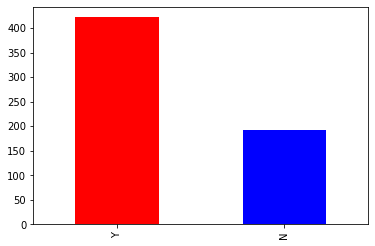

In [324]:
p.plot.bar(color=('red','blue')).set(xticklabels = ["Y", "N"])

C:\Users\NIKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

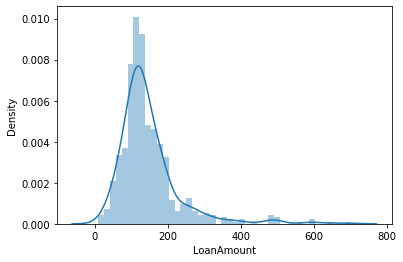

In [325]:
sns.distplot(df.LoanAmount) 


C:\Users\NIKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome'>

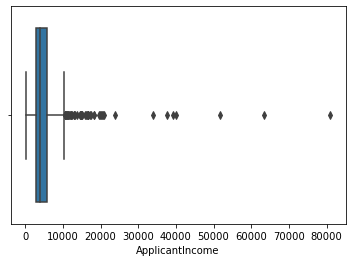

In [326]:
sns.boxplot(df.ApplicantIncome)

In [327]:
df.isna().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [328]:
df.dropna(inplace=True, axis=0) #axis value 0, means its a row. axis value 1 means its a column

In [329]:
df.isna().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [330]:
df.shape

(480, 13)

In [331]:
# Male = 0, Female = 1
df['Gender'] = df['Gender'].replace({'Male':0, 'Female':1,'unknown' : 2})
# Yes = 1, No = 0
df['Married'] = df['Married'].replace({'Yes' :1, 'No': 0, 'unknown':2})
# Graduate = 1, Not Graduate = 0
df['Education'] = df['Education'].replace ({'Graduate' : 1, 'Not Graduate' : 0})
# Yes: 1
# No : 0
# unknown:2
df['Self_Employed'] = df['Self_Employed'].replace ({'Yes': 1,'No' : 0, 'unknown':2})
df['Property_Area'] = df['Property_Area'].replace ({'Semiurban': 1,'Urban' : 0, 'Rural':2})
df['Loan_Status'] = df['Loan_Status'].replace({'Y':1, 'N':0})
df['Dependents'] = df['Dependents'].replace({'3+':3})


In [332]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0,1


# Train & Test Split

In [333]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,1:-1]
y = df.iloc[:, -1]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)
X.head() 

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0
5,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,0


In [334]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
LR = KNeighborsClassifier(n_neighbors=10)



# KNN Accuracy

In [335]:
#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy ", LR.score(X_test, y_test)*100)


Accuracy  70.83333333333334


# User Input

In [339]:
Gen= input("Input Gender 1 for Male 0 for Female")
Marr= input("If marrried Input 1 for Yes and 0 for No")
Depen= input("Depedents present ? \n Input 1, 2 or 3+ in case of more than 3")
Edu= input ("Education level \n Input 0 for Not Graduate 0 and 1 for Graduate ")
SelfEmp= input("Self employed ? \nInput 1 for Yes 0 for No")
AppInc= input("Enter Applicant income")
CoApInc=input("Enter co Applicant income")
LoAmt=input("Enter loan amount")
LoAmtTerm=input("Enter loan amount term")
Crehis=input("Enter credit history")
PropAre=input("Enter property area1 for urban and 0 for rural")
X_actual_values=[Gen,Marr,Depen,Edu,SelfEmp,AppInc,CoApInc,LoAmt,LoAmtTerm,Crehis,PropAre]
X_actual_values

Input Gender 1 for Male 0 for Female1
If marrried Input 1 for Yes and 0 for No1
Depedents present ? 
 Input 1, 2 or 3+ in case of more than 31
Education level 
 Input 0 for Not Graduate 0 and 1 for Graduate 1
Self employed ? 
Input 1 for Yes 0 for No1
Enter Applicant income1
Enter co Applicant income1
Enter loan amount1
Enter loan amount term1
Enter credit history1
Enter property area1 for urban and 0 for rural1


['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1']

In [353]:
X_actual_values=np.array(X_actual_values).astype('int16')
X_actual_values=X_actual_values.reshape(1,11)
X_actual_values=pd.DataFrame(X_actual_values)
X_actual_values.columns=(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
'Loan_Amount_Term', 'Credit_History', 'Property_Area'])
y_actual_pred=LR.predict(X_actual_values)
print('Should the person be given a loan ? \n1 for yes 0 for no. \n As per KNN the answer is =',y_actual_pred)

Should the person be given a loan ? 
1 for yes 0 for no. 
 As per KNN the answer is = [1]


# Decision Tree Gini Accuracy

In [354]:
df = dtree(
           criterion="gini",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )

In [355]:
df.fit(X_train,y_train)

DecisionTreeClassifier()

In [362]:
y_te = df.predict(X_test)

In [357]:
np.sum((y_test == y_te))/y_test.size 

0.75

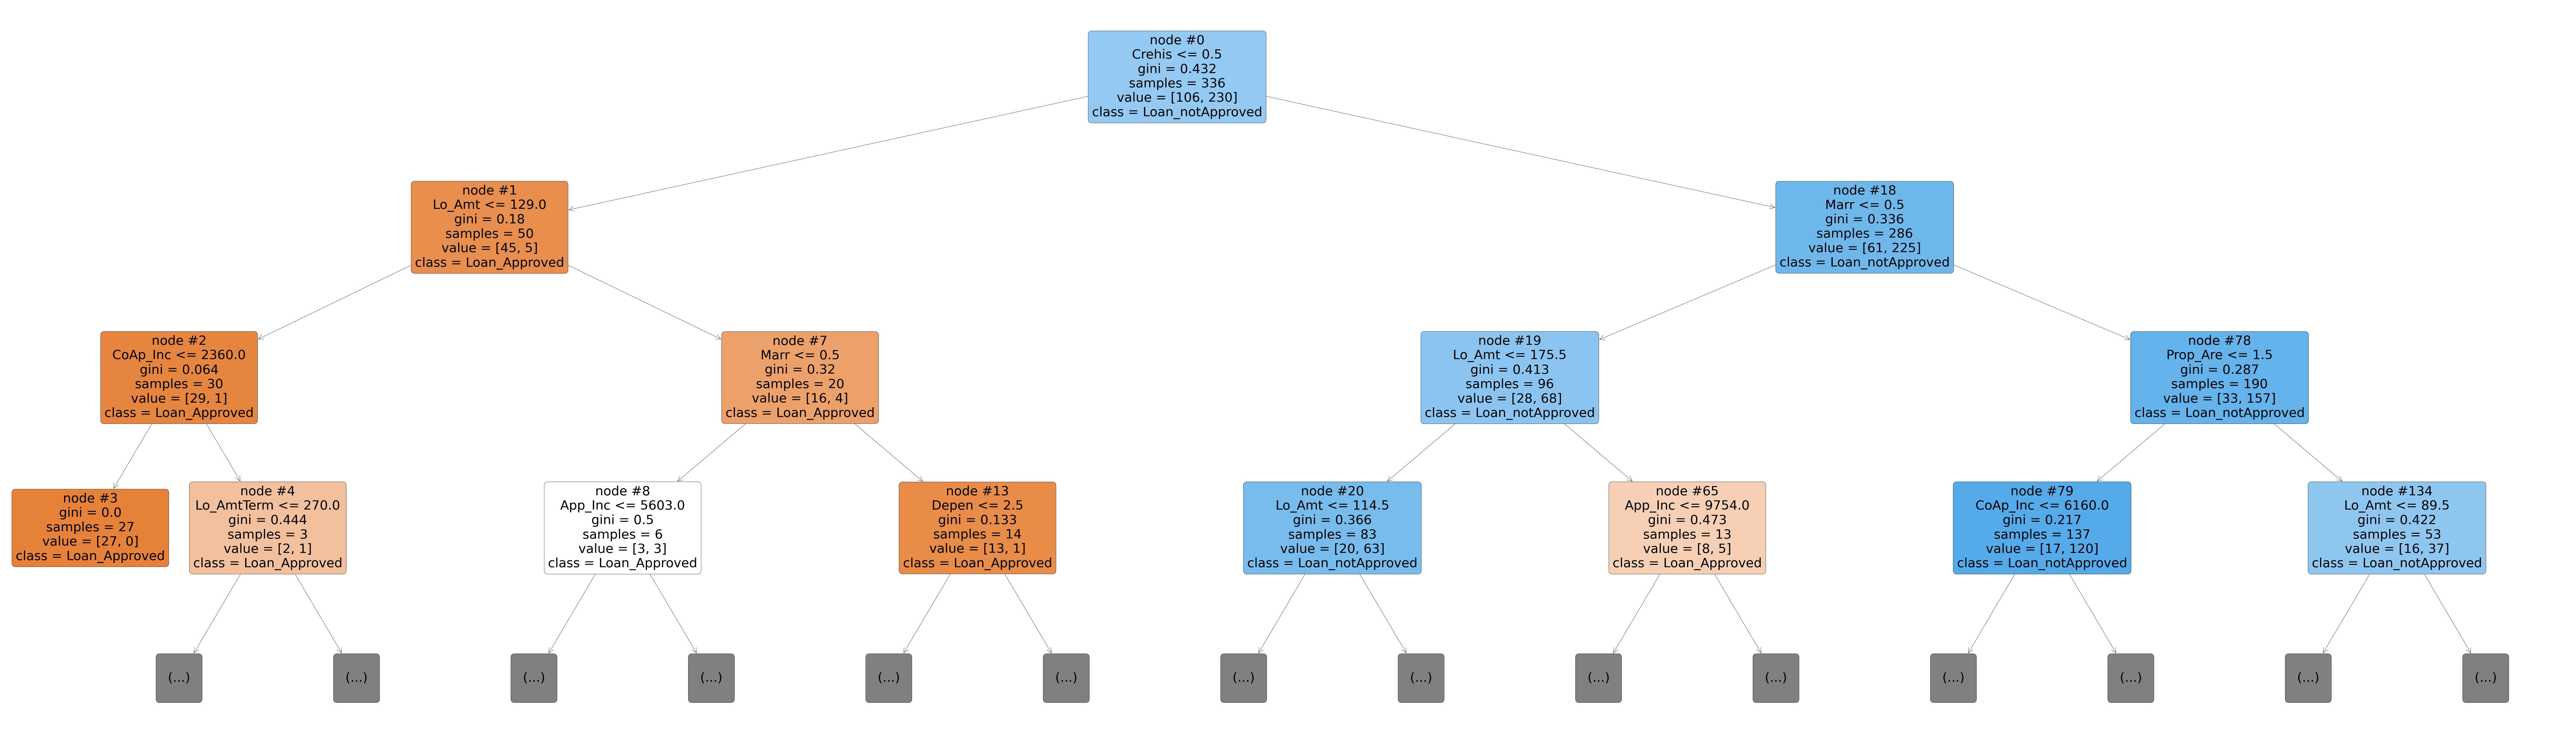

In [358]:
_= plt.figure(figsize=(200,60))
_= plot_tree(
            df,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["Gen","Marr","Depen","Edu","Self_Emp","App_Inc","CoAp_Inc","Lo_Amt","Lo_AmtTerm","Crehis","Prop_Are"],
            class_names = ["Loan_Approved","Loan_notApproved"]
            )

_= plt.show()

# Decison Tree Entropy Accuracy

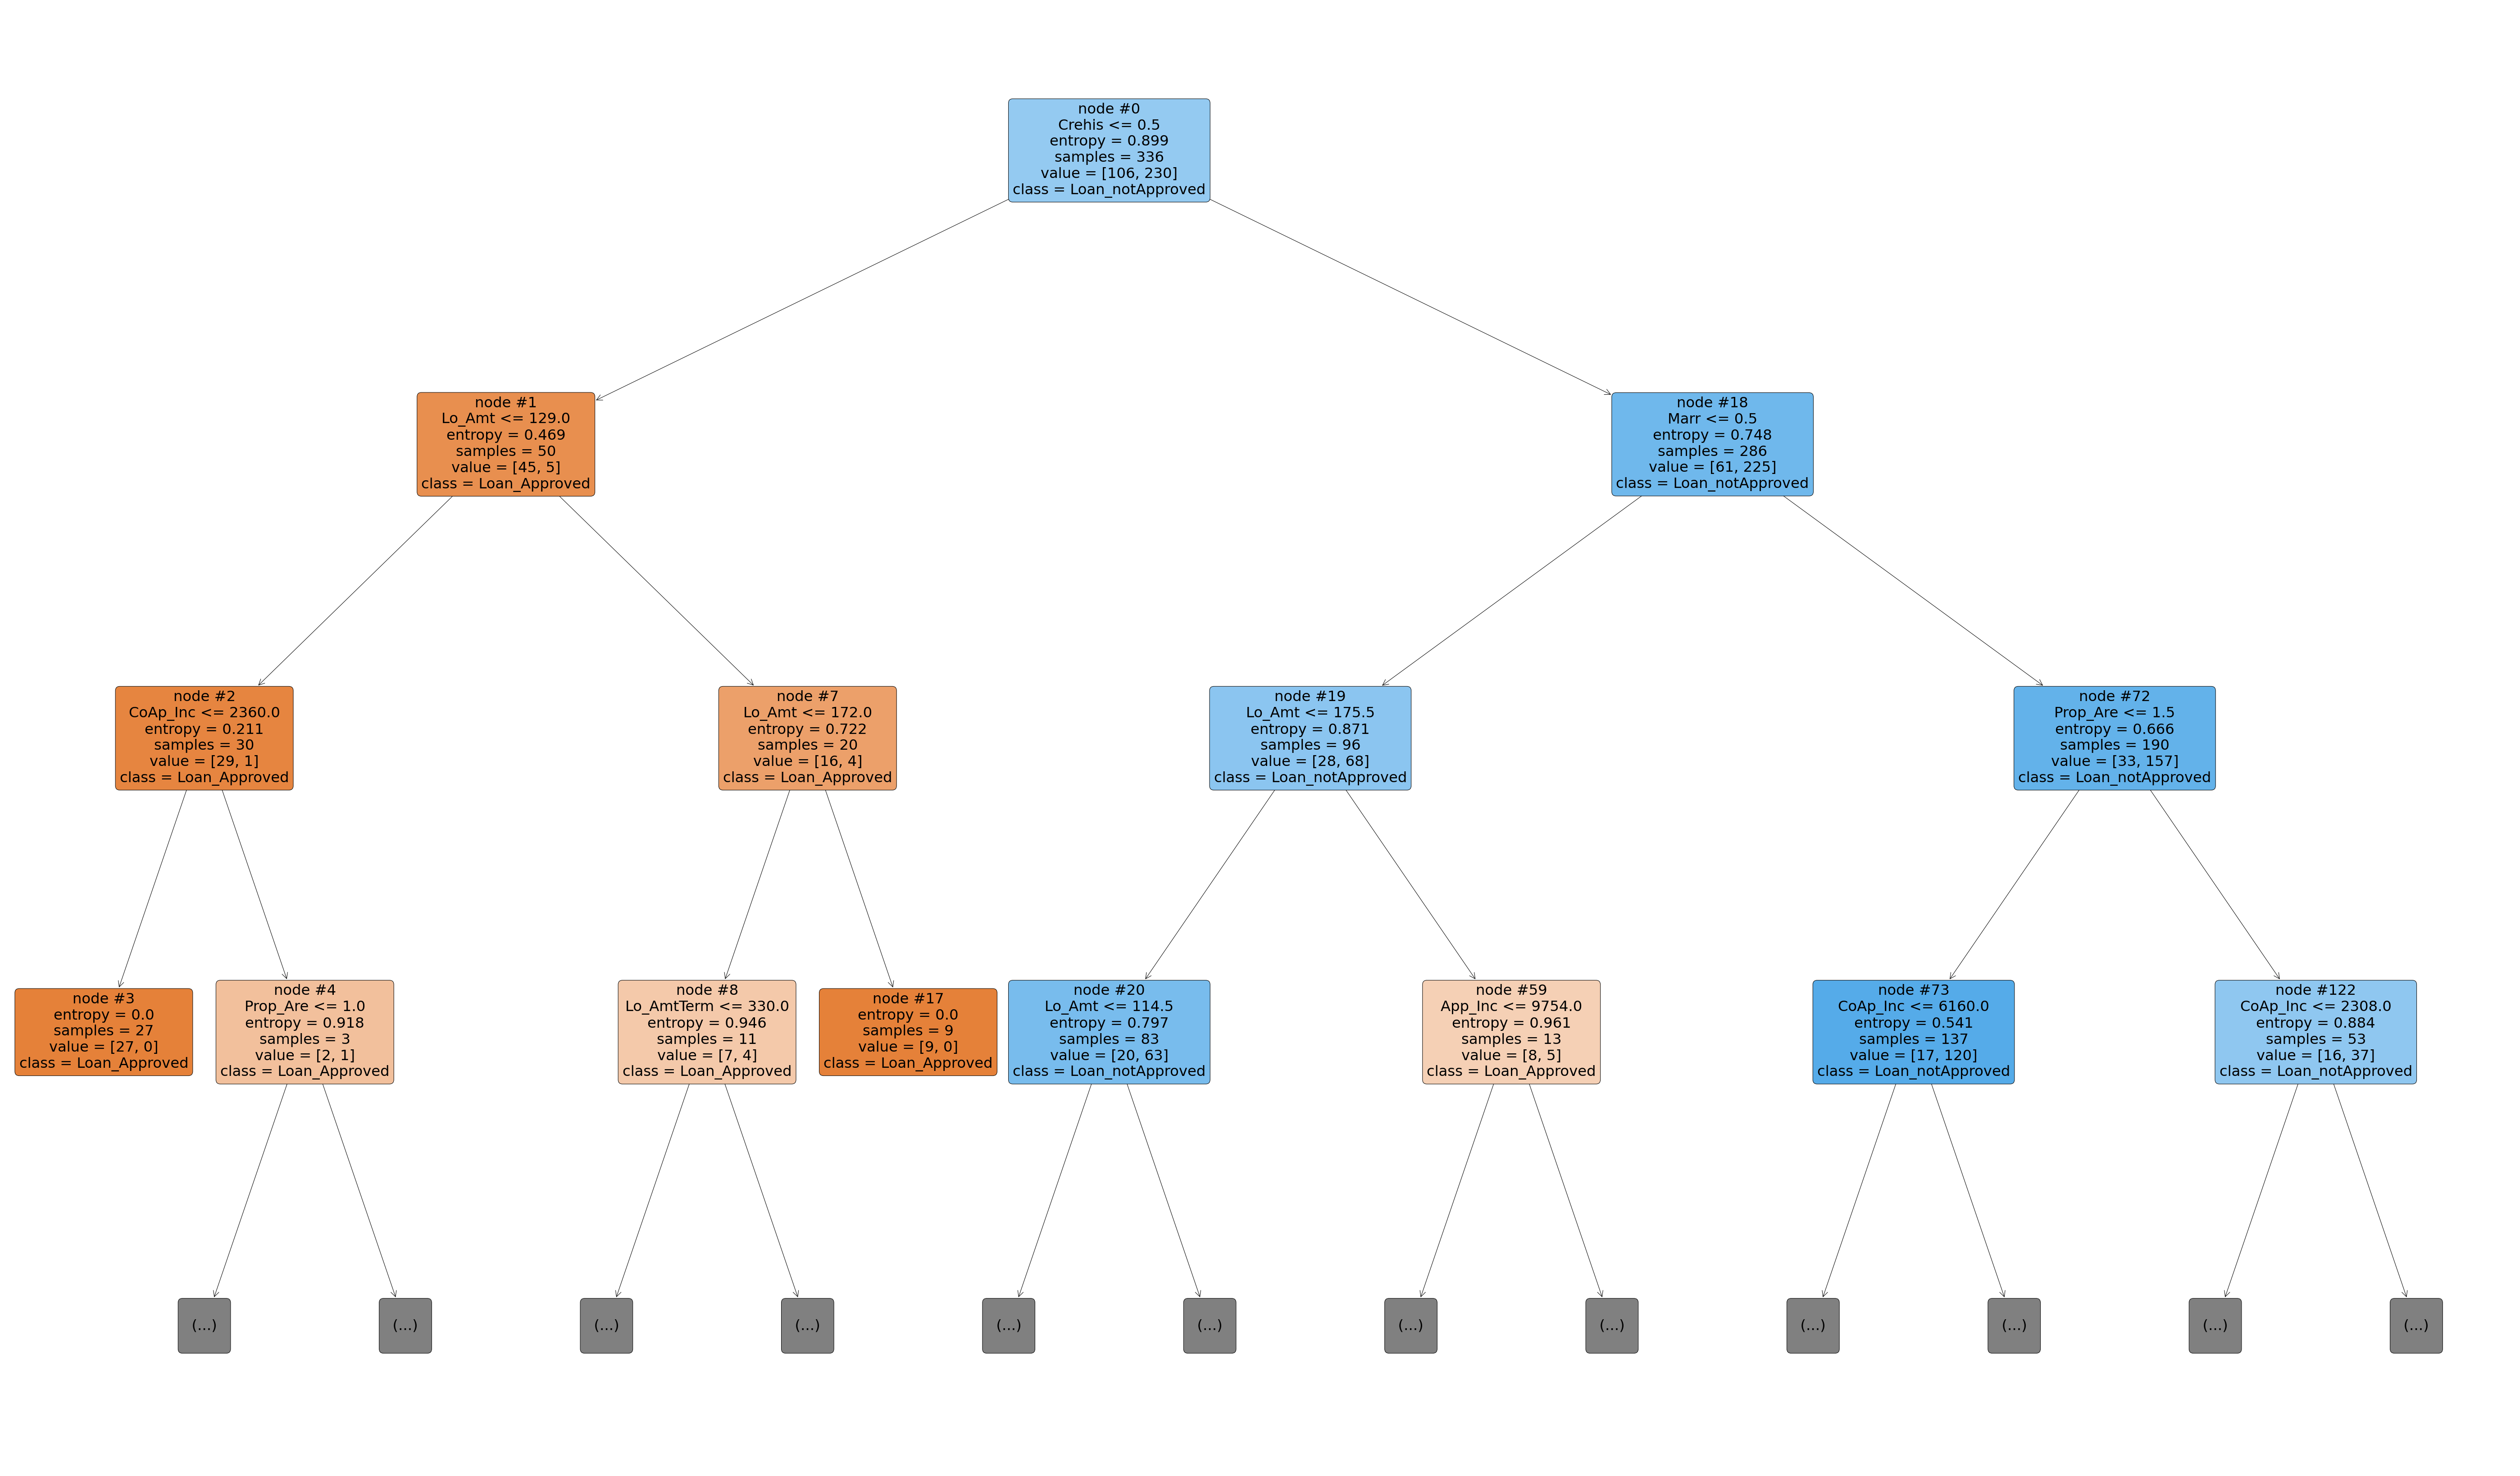

In [359]:
# 5.0 Plot decision tree with 'entropy' as criterion:

df = dtree(
           criterion="entropy",    # Alternative 'entropy'
           max_depth=None       # Alternative, specify an integer
                              # 'None' means full tree till single leaf
           )
# 5.1
_=df.fit(X_train,y_train)

# 5.2
_=plt.figure(figsize=(100,60))
_=plot_tree(
            df,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ["Gen","Marr","Depen","Edu","Self_Emp","App_Inc","CoAp_Inc","Lo_Amt","Lo_AmtTerm","Crehis","Prop_Are"],
            class_names = ["Loan_Approved","Loan_notApproved"]
            )

_=plt.show()

In [363]:
y_te = df.predict(X_test)
np.sum((y_test == y_te))/y_test.size

0.6597222222222222

In [360]:
fi = df.feature_importances_
fi

array([0.01129937, 0.01221843, 0.04885588, 0.00628775, 0.05012626,
       0.20993885, 0.11348619, 0.25691294, 0.04062649, 0.21475816,
       0.03548968])

In [361]:
list(zip(X_actual_values.columns, fi))

[('Gender', 0.011299365656416135),
 ('Married', 0.012218431141476124),
 ('Dependents', 0.04885588409282026),
 ('Education', 0.006287747611854604),
 ('Self_Employed', 0.05012626369447928),
 ('ApplicantIncome', 0.20993884878991403),
 ('CoapplicantIncome', 0.1134861885033256),
 ('LoanAmount', 0.25691293678590643),
 ('Loan_Amount_Term', 0.04062649281637987),
 ('Credit_History', 0.21475816164835243),
 ('Property_Area', 0.035489679259075244)]

# Conclusion

KNN Accuracy = 70.83%, Decision Tree classfier Accuracy using Gini = 75%, Decision Tree classifier Accuracy using Entropy is 65.9%. Hence in this case Dtree using gini is giving the best acccuracy among the three